In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spotify_cl.csv')

In [4]:
def outliers_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return {col: np.array(df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)].index)}
def outliers_zscore(df, col):
    z = np.abs(stats.zscore(df[col]))
    return {col:  np.array(df[(z > 3) | (z < -3)].index)  }

{'danceability': [80, 93, 98], 'energy': [], 'loudness': [80], 'speechiness': [23, 35, 40, 55, 91, 97], 'acousticness': [3, 13, 25, 38, 52, 75, 80, 84, 94, 99], 'instrumentalness': [0, 1, 12, 15, 17, 18, 36, 43, 57, 61, 62, 71, 78, 89, 93], 'liveness': [0, 4, 6, 11, 16, 17, 22, 28, 31, 33, 41, 44, 49, 74, 90], 'valence': [], 'tempo': [], 'duration_ms': [21, 28, 38, 42, 94], 'ranking': [], 'cluster': []}


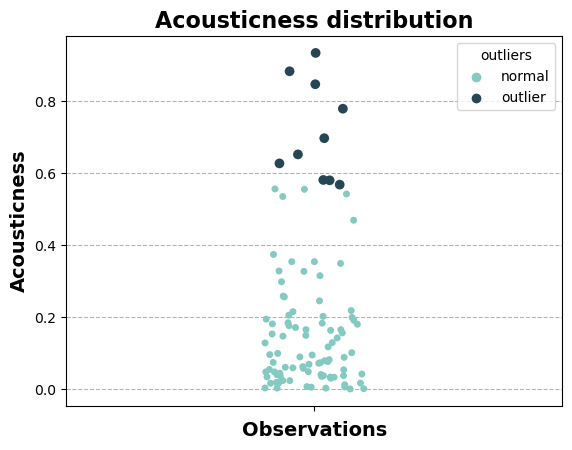

In [118]:
class Outliersdetection:

    palette = (133/255, 202/255, 194/255), (38/255, 70/255, 83/255)
    def __init__(self, col = None):
        self.col = col
    
    def __outliers_iqr(self, df, col):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        return list(df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)].index)

    def __outliers_zscore(self, df, col):
        z = np.abs(stats.zscore(df[col]))
        return list(df[(z > 3) | (z < -3)].index) 

    def __stripplot(self, df, col):
        
        title = col[0].capitalize()
        sns.stripplot(data=df, y=col[0], hue="outliers", palette=self.palette, size = df['size'])
        plt.xlabel('Observations', fontsize=14, fontweight='bold'), plt.ylabel(title, fontsize=14, fontweight='bold'), plt.title(f'{title} distribution', fontsize=16, fontweight='bold');
        plt.grid(True, alpha=0.3, linestyle='--', color='black', axis='y')
        plt.show()

    def __dataframe_plot(self, df, col, outliers):
            colname, outliers_tag, size = list(df[col[0]]), ['normal' if _ not in outliers[col[0]] else 'outlier' for _ in range(len(df))], [5 if _ not in outliers[col[0]] else 7 for _ in range(len(df))]
            new_df = pd.DataFrame([colname, outliers_tag, size]).T.rename(columns={0: col[0], 1: 'outliers', 2: 'size'})
            new_df['size'] = new_df['size'].astype(int)
            return new_df

    ########################################################################################################################################################################################################################

    def outliers(self, df, col, method):

        if type(df) != pd.core.frame.DataFrame:
            try: df = pd.DataFrame(df)
            except: raise ValueError('The data must be a DataFrame or a list')

        numeric_columns = df.select_dtypes(include=np.number).columns

        if col == 'all': col = numeric_columns
        elif type(col) != list: col = [col]
        else: raise ValueError('Use list, an string or use "all" argument to select all columns')

        if set(col).issubset(numeric_columns):
            
            if method == 'iqr': return {v: self.__outliers_iqr(df, v) for v in col}
            elif method == 'zscore': return {v: self.__outliers_zscore(df, v) for v in col}
            elif method == 'all':
                outliers_iqr, outliers_zscore =  [self.__outliers_iqr(df, v) for v in col], [self.__outliers_zscore(df, v) for v in col]
                return {v: list(set(outliers_iqr[i] + outliers_zscore[i])) for i, v in enumerate(col)}

            else: raise ValueError('Method must be iqr, zscore or all')

        else: raise ValueError('Columns must be numeric')

    def plot_outliers(self, df = None, col = None, method = 'all'):

        numeric_columns = df.select_dtypes(include=np.number).columns
        if type(col) != list: col = [col]




        hola = "sdsd"
        # else: raise ValueError('Use list or an string')

        if (set(col).issubset(numeric_columns)):
            if len(col) == 1:

                if method == 'iqr':  
                    outliers = {v: self.__outliers_iqr(df, v) for v in col}
                    new_df = self.__dataframe_plot(df, col, outliers)
                    self.__stripplot(new_df, col)

                elif method == 'zscore': 
                    outliers = {v: self.__outliers_zscore(df, v) for v in col}
                    new_df = self.__dataframe_plot(df, col, outliers)
                    self.__stripplot(new_df, col)            
                    
                elif method == 'all':
                    outliers_iqr, outliers_zscore =  [self.__outliers_iqr(df, v) for v in col], [self.__outliers_zscore(df, v) for v in col]
                    outliers = {v: list(set(outliers_iqr[i] + outliers_zscore[i])) for i, v in enumerate(col)}
                    new_df = self.__dataframe_plot(df, col, outliers)
                    self.__stripplot(new_df, col)

                else: raise ValueError('Method must be iqr, zscore or all')

            else: raise ValueError('Use only one numeric column')
        else: raise ValueError('The column may not exist or may not be numeric')
        
            
od = Outliersdetection()
print(od.outliers(df, 'all', method = 'iqr'))
od.plot_outliers(df, ['acousticness'], method = 'all')

In [14]:
def outliers_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return {col: np.array(df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)].index)}

* devuelve diccionario con las posiciones
* puedes meter el df entero o por columnas
* union entre la detección de Zscore y IQR